In [45]:
import os
#from ubxpostutils import genconfig

# /home/julian/extrepositories/RTKLIB-rtkexplorer/app/rtkrcv/gcc/rtkrcv -s -o 
# /home/julian/repositories/RTK_on_the_beach/conf/csingle.conf
from ubxpostutils import genconfig



7

In [46]:
# !!! make all the ports configurable with good names that match the 
# port names given in the application

# find what ports are still open with netstat -anp | less


<function ubxpostutils.genconfig(fdir, clines)>

In [16]:
# Firstly we must operate the system with a single station on the base station 
# and be able to average it to create the base station value

# This will require monitoring the rtkrcv server thing till it starts getting good 
# GPS values and we lift a whole bunch into the POS file

# Then we generate a new config file for it and the rover with that base station 
# position injected into it

import os
import sys
sys.path.append("../scripts")
from ubxpostutils import genconfig
from posbankthread import RtkRcvController

# /home/julian/extrepositories/RTKLIB-rtkexplorer/app/rtkrcv/gcc/rtkrcv -s -o 
# /home/julian/repositories/RTK_on_the_beach/conf/csingle.conf

fdir = "/tmp"
fcmdfileCCC = os.path.join(fdir, "fcmdfileCCC.txt")
open(fcmdfileCCC, "w").write("-CCC\n@\n")

fconfig = genconfig(fdir, ["out-solformat      =llh", 
                           "inpstr1-type       =tcpcli",
                           "inpstr1-path       =:@192.168.43.1:9042/::",
                           "inpstr1-format     =ubx",
                           "file-cmdfile1      =%s" % fcmdfileCCC,
                           "outstr1-type       =tcpsvr",
                           "outstr1-path       =:@192.168.43.1:9063/::", 
                           "pos1-posmode       =single"])

rtkrcvc = RtkRcvController(fconfig, telnetport=9049)
rtkrcvc.start()
rtkrcvc.sendrcvcmd("stream")


/home/julian/extrepositories/RTKLIB-rtkexplorer/app/rtkrcv/gcc/rtkrcv -p 9049 -s -o /tmp/temp.conf
process started None
rtkrcvsocket open
<**> sending back a password


"b'\\xff\\xfb\\x03\\xff\\xfb\\x01\\r\\n'\nb'\\x1b** rtkrcv ver.demo5 b31 console (h:help) **\\x1b\\r\\n'\nb'password: * \\x08\\r\\n'"

<**> sending back a password
<**> sending back a password


In [ ]:
# We need to control the rtkrcv code for a bit

In [20]:
print(rtkrcvc.sendrcvcmd("stream"))


b'rtkrcv> s \x08t \x08r \x08e \x08a \x08m \x08\r\n'
b'\r\n'
b'\x1bStream       Type     Fmt   S    In-byte  In-bps   Out-byte Out-bps Path                     Message\x1b\r\n'
b'input rover  tcpcli   ubx   C      29309   18290          6       0 :@192.168.43.1:9042/::   192.168.43.1\r\n'
b'input base   -        rtcm2 -          0       0          0       0                          \r\n'
b'input corr   -        rtcm2 -          0       0          0       0                          \r\n'
b'output sol1  tcpsvr   llh   C          0       0          0       0 :@192.168.43.1:9063/::   waiting...\r\n'
b'output sol2  -        llh   -          0       0          0       0                          \r\n'
b'log rover    -        -     -          0       0          0       0                          \r\n'
b'log base     -        -     -          0       0          0       0                          \r\n'
b'log corr     -        -     -          0       0          0       0                          

In [21]:
print(rtkrcvc.sendrcvcmd("status"))


b'rtkrcv> s \x08t \x08a \x08t \x08u \x08s \x08\r\n'
b'\r\n'
b'\x1bParameter                   : Value\x1b\r\n'
b'rtklib version              : demo5 b31\r\n'
b'rtk server thread           : -1416743168\r\n'
b'rtk server state            : run\r\n'
b'processing cycle (ms)       : 10\r\n'
b'positioning mode            : single\r\n'
b'frequencies                 : L1+L2\r\n'
b'accumulated time to run     : 00:00:17.2\r\n'
b'cpu time for a cycle (ms)   : 1\r\n'
b'missing obs data count      : 0\r\n'
b'bytes in input buffer       : 0,0\r\n'
b'# of input data rover       : obs(86),nav(0),gnav(0),ion(0),sbs(0),pos(0),dgps(0),ssr(0),err(0)\r\n'
b'# of input data base        : obs(0),nav(0),gnav(0),ion(0),sbs(0),pos(0),dgps(0),ssr(0),err(0)\r\n'
b'# of input data corr        : obs(0),nav(0),gnav(0),ion(0),sbs(0),pos(0),dgps(0),ssr(0),err(0)\r\n'
b'# of rtcm messages rover    : \r\n'
b'# of rtcm messages base     : \r\n'
b'# of rtcm messages corr     : \r\n'
b'solution status             : -\r\n

In [22]:
print(rtkrcvc.rtkrcvprocess.stdout.read())


KeyboardInterrupt: 

In [24]:
print(rtkrcvc.sendrcvcmd("shutdown"))


BrokenPipeError: [Errno 32] Broken pipe

 <class 'MemoryError'>


In [ ]:

# The below handles the rover and base station and can set up the tracking shape


In [18]:
#
# This is where the normal stuff starts
# (moving data via the dynamic devices sockets copied to the bottom)
#

# /home/julian/extrepositories/RTKLIB-rtkexplorer/app/rtkrcv/gcc/rtkrcv -s -o /home/julian/repositories/RTK_on_the_beach/conf/csingle.conf

# /home/julian/extrepositories/RTKLIB-rtkexplorer/app/rtkrcv/gcc/rtkrcv -s -o /home/julian/repositories/RTK_on_the_beach/conf/ackinematic.conf


# this command should be run from python where we can generate the config file
# Then check status with commands stream and status

# Cannot run the code below in jupyter labs, use notebook



<PositionBank(Thread-9, started daemon 140230515357440)>

In [4]:
from posbankthread import PositionBank, DarknessMeasureFlash
#posbank = PositionBank(port="random")
posbank = PositionBank(port=9063)
posbank.start()
# posbank.sockerrfile.close()

connecting to port 9063
port 9063 open
b'2019/07/13 09:50:14.800   53.395365053   -2.972502494    87.9758   2   9   0.2169   0.2300   0.4891   0.1235   0.0660  -0.1102   3.19    0.0\n'


In [38]:
print(posbank.x, posbank.y, posbank.z)

0.19661364683334007 -1.6824827838476168 85.9673


In [4]:
# We must somehow get the averaged base position into the config file

NameError: name 'posbankA' is not defined

<IPython.core.display.Javascript object>


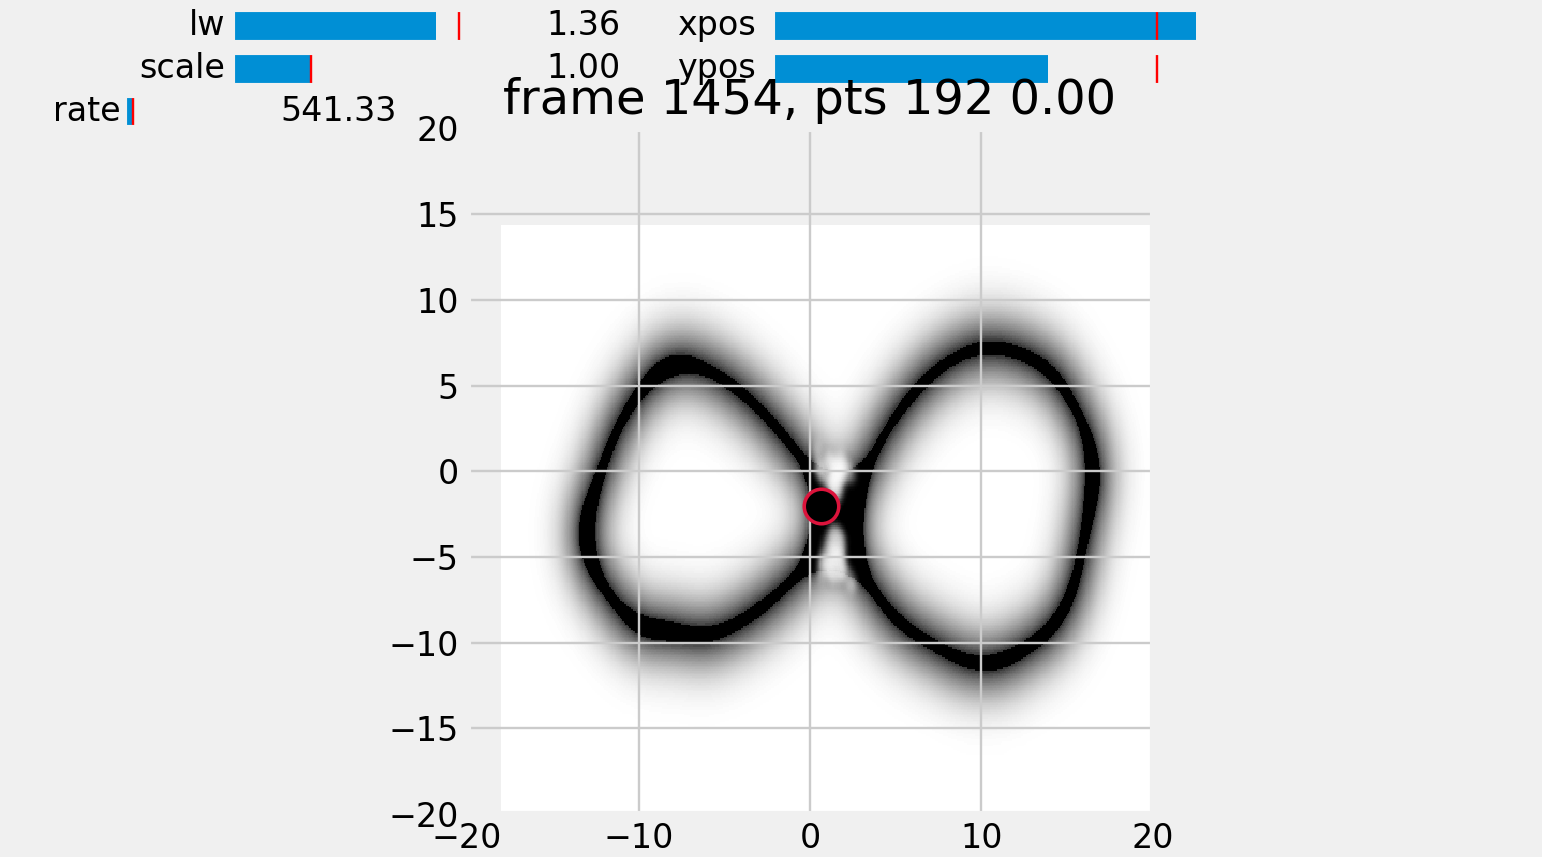

flash connecting
flash b'Hello from Android thread 20\n'


In [39]:
%matplotlib notebook

import matplotlib
import matplotlib.animation
import matplotlib.pyplot as plt
import mpl_toolkits.axes_grid1
import math

matplotlib.style.use('fivethirtyeight')

# First set up the figure, the axis, and the plot element we want to animate
fig, ax = plt.subplots(figsize=(9,5))
ax.xaxis.set_visible(False)
ax.yaxis.set_visible(False)
playradmetres = 20 
playimg = matplotlib.image.imread('../shape2.png')

# hard code the relative positions of the axes we draw in here
linewidthsliderax = fig.add_axes([0.15, 0.95, 0.20, 0.04], label="controls") # [left,bottom,width,height] as a proportion
bgscalesliderax = fig.add_axes([0.15, 0.90, 0.20, 0.04], label="scale")
bgxpossliderax = fig.add_axes([0.5, 0.95, 0.5, 0.04], label="xposslider")
bgypossliderax = fig.add_axes([0.5, 0.90, 0.5, 0.04], label="yposslider")
updateratesliderax = fig.add_axes([0.08, 0.85, 0.1, 0.04], label="updaterate")

gax = fig.add_axes([0.05, 0.05, 0.95, 0.8], "graphics")
#gax.set_aspect("equal")

trackline, = gax.plot([], [], lw=1)
trackpoint, = gax.plot([], [], marker="o", color="crimson", ms=15)
trackpointC, = gax.plot([], [], marker="o", color="crimson", ms=12)
imgplot = gax.imshow(playimg)
imgplot.set_extent((-playradmetres, playradmetres, -playradmetres, playradmetres))

dmeasf = DarknessMeasureFlash(posbank.queuepoints, imgplot)
dmeasf.start()

gax.set_xlim((-playradmetres, playradmetres))
gax.set_ylim((-playradmetres, playradmetres))


def init():
    trackline.set_data([], [])
    return trackline,

def updateframe(i):
    k = posbank.pdposarray.iloc[:posbank.n]
    trackline.set_data(k.x, k.y)
    trackpoint.set_data(posbank.x, posbank.y)
    trackpointC.set_data(posbank.x, posbank.y)
    
    fp = dmeasf.getunderpixelQ(posbank.x, posbank.y)

    v = max(0, min(255, int(255*fp)))
    col = "#%.2x%.2x%.2x" % (v,v,v)
    trackpointC.set_color(col)
    gax.set_title("frame %d, pts %d %0.2f" % (i, posbank.n, fp))
    return trackline,

def updatefromcontrols(XX):
    trackline.set_linewidth(linewidthslider.val)
    xpos = bgxposslider.val
    ypos = bgyposslider.val
    scale = bgscaleslider.val
    imgplot.set_extent((-playradmetres*scale+xpos, playradmetres*scale+xpos, 
                        -playradmetres*scale+ypos, playradmetres*scale+ypos))
    
def updateframerate(XX):
    anim.event_source.interval = updaterateslider.val
    
linewidthslider = matplotlib.widgets.Slider(linewidthsliderax, 'lw', 0.1, 2, valinit=1.5)
bgscaleslider = matplotlib.widgets.Slider(bgscalesliderax, 'scale', 0.3, 3, valinit=1.0)
bgxposslider = matplotlib.widgets.Slider(bgxpossliderax, 'xpos', -playradmetres, playradmetres, valinit=0)
bgyposslider = matplotlib.widgets.Slider(bgypossliderax, 'ypos', -playradmetres, playradmetres, valinit=0)
updaterateslider = matplotlib.widgets.Slider(updateratesliderax, 'rate', 200, 5000, valinit=500)

linewidthslider.on_changed(updatefromcontrols)
bgscaleslider.on_changed(updatefromcontrols)
bgxposslider.on_changed(updatefromcontrols)
bgyposslider.on_changed(updatefromcontrols)
anim = matplotlib.animation.FuncAnimation(fig, updateframe, init_func=init, interval=200, blit=True)
updaterateslider.on_changed(updateframerate)
updatefromcontrols(0)

plt.show()
#cur_axes.axes.get_xaxis().set_visible(False)

# put altitude here too

In [4]:
# to suppress this thread
import queue
#dmeasf.queuepoints = queue.Queue(1)

In [25]:
dmeasf.queuepoints

In [9]:
dmeasf.socketconnectedFlash.settimeout(1000)

In [40]:
import socket
socketconnectedFlash = socket.socket()
socketconnectedFlash.settimeout(2)
print(socket.getaddrinfo("192.168.43.2", 9042))
socketconnectedFlash.connect(socket.getaddrinfo("192.168.43.2", 9042)[0][-1])


[(<AddressFamily.AF_INET: 2>, <SocketKind.SOCK_STREAM: 1>, 6, '', ('192.168.43.2', 9042)), (<AddressFamily.AF_INET: 2>, <SocketKind.SOCK_DGRAM: 2>, 17, '', ('192.168.43.2', 9042)), (<AddressFamily.AF_INET: 2>, <SocketKind.SOCK_RAW: 3>, 0, '', ('192.168.43.2', 9042))]


timeout: timed out

In [34]:
sockerrfileFlash = socketconnectedFlash.makefile('rwb', 0)
sockerrfileFlash.readline()


b'Hello from Android thread 6\n'

In [17]:
dmeasf.queuepoints.qsize(), dmeasf.exceptioncount, dmeasf.lastexception, dmeasf

(0,
 2,
 ConnectionResetError(104, 'Connection reset by peer'),
 <DarknessMeasureFlash(Thread-8, started daemon 139648711067392)>)

True

In [28]:
dmeasf.exceptioncount, dmeasf.lastexception, posbank.n

(8, ConnectionResetError(104, 'Connection reset by peer'), 182)

In [27]:
k = posbank.pdposarray.iloc[:posbank.n]
#plt.plot(k.x, k.y)
k



,t,x,y,z
0,2019-04-14 07:59:57.000,0.052705,0.066346,98.4326
1,2019-04-14 07:59:57.200,0.055692,0.067014,98.4336
2,2019-04-14 07:59:57.400,0.055824,0.040854,98.4845
3,2019-04-14 07:59:57.600,0.055028,0.043526,98.4851
4,2019-04-14 07:59:57.800,0.055824,0.042524,98.4842
5,2019-04-14 07:59:58.000,0.054962,0.044750,98.4870
6,2019-04-14 07:59:58.200,0.056024,0.045196,98.4866
7,2019-04-14 07:59:58.400,0.054762,0.070799,98.4381
8,2019-04-14 07:59:58.600,0.058944,0.069463,98.4356
9,2019-04-14 07:59:58.800,0.056621,0.065901,98.4345


flash connecting
flash b'Hello from Android thread 66\n'



convbin on hdata-2019-04-14_12-15-21A.ubx
input file  : /home/julian/data/hanglog/20190414121521/hdata-2019-04-14_12-15-21A.ubx (u-blox)
->rinex obs : /home/julian/data/hanglog/20190414121521/hdata-2019-04-14_12-15-21A.obs
->rinex nav : /home/julian/data/hanglog/20190414121521/hdata-2019-04-14_12-15-21A.nav
->rinex gnav: /home/julian/data/hanglog/20190414121521/hdata-2019-04-14_12-15-21A.gnav
->rinex hnav: /home/julian/data/hanglog/20190414121521/hdata-2019-04-14_12-15-21A.hnav
->rinex qnav: /home/julian/data/hanglog/20190414121521/hdata-2019-04-14_12-15-21A.qnav
->rinex lnav: /home/julian/data/hanglog/20190414121521/hdata-2019-04-14_12-15-21A.lnav
->rinex cnav: /home/julian/data/hanglog/20190414121521/hdata-2019-04-14_12-15-21A.cnav
->rinex inav: /home/julian/data/hanglog/20190414121521/hdata-2019-04-14_12-15-21A.inav
->sbas log  : /home/julian/data/hanglog/20190414121521/hdata-2019-04-14_12-15-21A.sbs

scanning: 2019/04/14 13:11:05 GR
2019/04/14 12:15:41-04/14 13:11:06: O=16626 N=10

In [23]:
import subprocess
#help(subprocess.run)
k = subprocess.run(["ls", ".."], stdout=subprocess.PIPE)

In [24]:
k.stdout

b'conf\nlabstest.ipynb\nLICENSE\nnotebooks\nREADME.md\nrtkrcv_201904031828.trace\nrtkrcv_201904061551.trace\nrtkrcv.nav\nshape1.png\n'

In [6]:
fname = "/home/julian/data/hanglog/20190413191745/hdata-2019-04-13_19-17-45C.ubx"
fin = open(fname, "rb")
fin.read(100)
#fin = open("/home/julian/data/hanglog/20190413125238crosby/hdata-2019-04-13_12-52-38A.ubx", "rb")
fin.read(100)


b'\xa8c!\xb9\xb5b\x010\x14\x008c\x00\x00\x01\x04\x00\x00\x00\x05\x10\x03\x08\xa5\x00\x00\x00\x00\x00\x00\xaa\xda\xb5b\x01"\x14\x008c\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\xff\xff\xff\xff|69\x00\xb9\x81\xb5b\x02\x15\x10\x00\x9a\x99\x99\x99\x99\x998@\x00\x00\x11\x00\x00\x01pd\x1cm\xb5b\x010\x14\x00\x00d\x00\x00\x01\x04\x00\x00\x00\x05'

In [32]:
set(fin.read(1000))

{'\x00'}

In [80]:
# Use this to prove we can send signals to the flashing LED on the esp
import socket
socketconnectedFlash = socket.socket()
print("flash connecting")
socketconnectedFlash.connect(socket.getaddrinfo("192.168.43.1", 9042)[0][-1])
sockerrfileFlash = socketconnectedFlash.makefile('rwb', 0)
row = sockerrfileFlash.readline()
print("flash", row)
socketconnectedFlash.send(b"+AAA")


flash connecting
flash b'Hello from Android thread 113\n'


4

In [94]:
fp = 0.1
if fp == -1:
    timeradd, timerlight = 20, 80
else:
    timeradd = 30 + fp*(250-30)
    timerlight = 60 + fp*(600-60)
socketconnectedFlash.send(b"%d %d\n" % (timeradd, timerlight))


7

In [65]:
# Use this to check the data that would be streaming into the rtksrv from the esp-ubloxes
import socket
socketconnectedFlash = socket.socket()
print("flash connecting")
socketconnectedFlash.connect(socket.getaddrinfo("192.168.43.1", 9042)[0][-1])
sockerrfileFlash = socketconnectedFlash.makefile('rwb', 0)
row = sockerrfileFlash.readline()
print("flash", row)
socketconnectedFlash.send(b"-AAA")


flash connecting
flash b'Hello from Android thread 94\n'


4

In [6]:
sockerrfileFlash.read(100)

b'\xb5b\x010\xd4\x00 \x0e\xa3\x01\x11\x04\x00\x00\x04\x05\r\x07!\x19\xb6\x00\xd2\xff\xff\xff\x0f\x08\x04\x01\x00\x08\x11\x00\x00\x00\x00\x00\x00\r\r\x07"Rm\x00\x03\x00\x00\x00\x01\x0f\r\x07 <\x1d\x01@\x01\x00\x00\x0b\x14\r\x04\x15\x11>\x01\xfe\xfa\xff\xff\x0e\x15\r\x07!\x0c"\x01\xd6\xff\xff\xff\x05\x18\r\x07\x1a\x16\xf6\x00\n\x01\x00\x00\x02\x1c'

In [3]:
# This first few cells is proving a connection via the node-red between two sockets
import socket
host = "localhost"
host = "node-red.dynamicdevices.co.uk"

port1 = 4005
addr1 = socket.getaddrinfo(host, port1)[0][-1]
port2 = 4006
addr2 = socket.getaddrinfo(host, port2)[0][-1]
print(addr1)


gaierror: [Errno -2] Name or service not known

In [2]:
s1 = socket.socket()
s1.connect(addr1)

s2 = socket.socket()
s2.connect(addr2)


ConnectionRefusedError: [Errno 111] Connection refused

In [3]:
s1

<socket.socket fd=44, family=AddressFamily.AF_INET, type=SocketKind.SOCK_STREAM, proto=0, laddr=('192.168.43.209', 43986), raddr=('144.76.167.54', 4005)>

In [4]:
import time
t0 = time.time()
n = 0
m = 0
for i in range(50):
    x = b"\x11\x02\x03\x04"*400
    s2.sendall(x)
    y = s1.recv(len(x))
    print(y[:10])
    m += len(y)
    n += len(x)
print(n, m, (time.time() - t0), n/((time.time() - t0)))

b'\x11\x02\x03\x04\x11\x02\x03\x04\x11\x02'
b'\x11\x02\x03\x04\x11\x02\x03\x04\x11\x02'
b'\x11\x02\x03\x04\x11\x02\x03\x04\x11\x02'
b'\x11\x02\x03\x04\x11\x02\x03\x04\x11\x02'
b'\x11\x02\x03\x04\x11\x02\x03\x04\x11\x02'
b'\x11\x02\x03\x04\x11\x02\x03\x04\x11\x02'
b'\x11\x02\x03\x04\x11\x02\x03\x04\x11\x02'
b'\x11\x02\x03\x04\x11\x02\x03\x04\x11\x02'
b'\x11\x02\x03\x04\x11\x02\x03\x04\x11\x02'
b'\x11\x02\x03\x04\x11\x02\x03\x04\x11\x02'
b'\x11\x02\x03\x04\x11\x02\x03\x04\x11\x02'
b'\x11\x02\x03\x04\x11\x02\x03\x04\x11\x02'
b'\x11\x02\x03\x04\x11\x02\x03\x04\x11\x02'
b'\x11\x02\x03\x04\x11\x02\x03\x04\x11\x02'
b'\x11\x02\x03\x04\x11\x02\x03\x04\x11\x02'
b'\x11\x02\x03\x04\x11\x02\x03\x04\x11\x02'
b'\x11\x02\x03\x04\x11\x02\x03\x04\x11\x02'
b'\x11\x02\x03\x04\x11\x02\x03\x04\x11\x02'
b'\x11\x02\x03\x04\x11\x02\x03\x04\x11\x02'
b'\x11\x02\x03\x04\x11\x02\x03\x04\x11\x02'
b'\x11\x02\x03\x04\x11\x02\x03\x04\x11\x02'
b'\x11\x02\x03\x04\x11\x02\x03\x04\x11\x02'
b'\x11\x02\x03\x04\x11\x02\x03\x

In [ ]:
import time
for i in range(50):
    y = s1.recv(50)
    print(y[:10])


In [109]:
port = 4006
addr = socket.getaddrinfo(host, port)[0][-1]
print(addr)

s2 = socket.socket()
s2.connect(addr)
s2.send(b"+kkk")
#s2.recv(4)


('144.76.167.54', 4006)


4

In [151]:
s1 = socket.socket()
s1.connect(addr1)


In [ ]:
s1.recv(10000)

In [171]:
s2.send(b"+kkk")


4

In [89]:
import socket
host = "localhost"
host = "freesteel.co.uk"
port = 80
addr = socket.getaddrinfo(host, port)[0][-1]
print(addr)


('93.93.131.30', 80)


In [90]:
s1 = socket.socket()
s1.connect(addr)
s1.send(b"+kkk")


4

In [83]:
s2 = socket.socket()
s2.connect(addr)
s2.send(b"-kkk")


4

In [84]:
s1.send(b"hi there")

8

In [85]:
s2.recv(6)

b'hi the'

In [32]:
s2.recv(4)

KeyboardInterrupt: 

In [11]:
sockerrfile = socketconnected.makefile('rwb', 0)
print(sockerrfile.read(4))


b'abcd'


In [ ]:
#
